<h1>Hi! This is my solution for Fall 2021 Data Science Intern Challenge.</h1>
<p style="font-size:20px;"> Name: Jay Kye</p>

<h2>Q1. Sneaker shop problem

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# First, let's load the data and see what it looks like.
DATASHEET = 'rsc/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv'
df = pd.read_csv(DATASHEET)
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
# It seems that we have order_id column which may be unique identifier and created_at column which is Datetime.
# Let's verify if there is any duplicate order record for each order_id and convert created_at to datetime.
duplicate_order = df['order_id'].duplicated().sum()
print(f"There are {duplicate_order} duplicate order records.")

There are 0 duplicate order records.


In [4]:
# Good. Let's change created_at column to datetime.
df['created_at'] = pd.to_datetime(df['created_at'])

In [5]:
# Now, let's quickly verify that the given information:
# 1. There are 100 shops
# 2. The data is over 30 days.
# 3. There is only one model per store. -- Let's assume that two different models would have diffrent prices and check if any store has more than one price_per_item.
df['price_per_item'] = df['order_amount'] / df['total_items']
print(f"The number of stores: {df['shop_id'].nunique()}")
print(f"Time window of our data: {df['created_at'].max() - df['created_at'].min()}")
print(f"There is only one model per store: {(df.groupby('shop_id')['price_per_item'].nunique() > 1).sum() == 0}")
# OK. The numbers seem right.

The number of stores: 100
Time window of our data: 29 days 23:47:26
There is only one model per store: True


In [6]:
# The problem states that the AOV is $3145.13 over a 30 day period.
df['order_amount'].mean()

3145.128

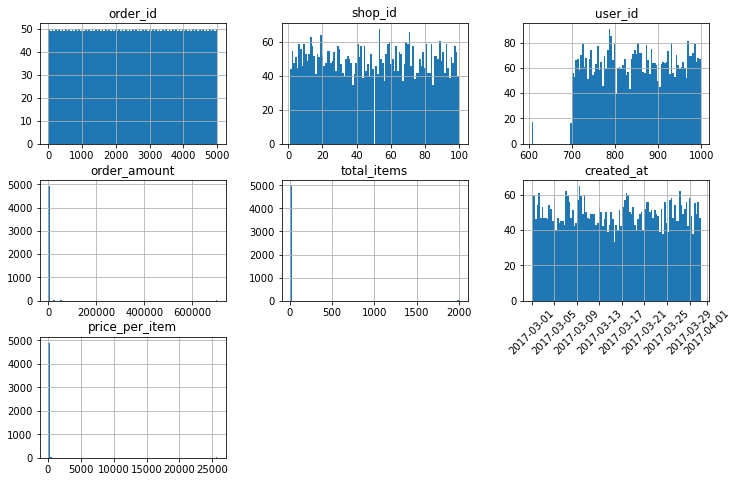

In [7]:
# Ok. The number does seem very high for sneakers. Let's check the distribution of our data with histograms.
subplots = df.hist(figsize= (12,8), bins = 101)
_ = plt.setp(subplots[1, 2].xaxis.get_majorticklabels(), rotation=45)  # formatting datetime axis

In [8]:
# I see extreme outliers in order_amount, total_items, price_per_item columns.
# order_amount is the product of total_items and price_per_item, and these two columns have outliers. Therefore, order_amount has outliers, too.

<br>
<h3> a. Think about what could be going wrong with our calculation. Think about a better
way to evaluate this data.</h3>
<p style="font-size:15px;">-> The average value is very high because the data has extreme outliers. First, check the distribution of your data points so that you can check for outliers. 
    Average is very sensitive to outliers and can be misleading.</p><br>

<p style="font-size:15px;"><b>More digging on the outliers:

In [9]:
# Let's check the high values in total_items and price_per_item columns
print('High values in total items')
high_quantity = df.loc[df['total_items'] > 1500]  # 1500 was picked from histogram.
display(high_quantity.head())

High values in total items


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00,352.0


In [10]:
# Interesting. The store with shop_id of 42 has a recurring payment at 4pm with credit card with same amount of items by the same user.
# Sometimes multiple orders were made at the same time.
# Does this user do the same thing on other stores?
print(df.loc[df['user_id'] == 607, 'shop_id'].unique())
# No, this seems to be a store-specific behavior.

[42]


In [11]:
# It seems like this user only buys in this store... 
# This could be the owner testing something or trying to pump up the transaction counts or it could be some fradulent activity.
# In real life situation, I would create an issue with an issue tracking software so that other teams that are more suitable to deal with these cases can look into this.

In [12]:
print('High values in price per item')
high_price = df.loc[df['price_per_item'] > 2500]  # 2500 was picked from histogram.
display(high_price.head())
# Similar thought process applys to the cases with high priced items. 
# This could very well be the owner calculating everying in cents, instead of dollar.
# In any case, I would check if there was any issue related to this and if not, create one, so that other people can refer to it in the future.

High values in price per item


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 07:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0


<br><h3> b. What metric would you report for this dataset?</h3>
<p style="font-size:15px;"> -> In case where there are outliers and I want to report a value that is representative of the data (e.g. average), I would use a metric more robust to outliers, such as <b>median</b>.
Another way is to filter out the outliers (e.g. use interquartile range) and then calculate the average.</p>

<h3> c. What is its value? </h3>
<p style="font-size:15px;"> -> 284.0

In [13]:
print(f"The median of order value is: {df['order_amount'].median()}")

The median of order value is: 284.0


<br>
<h2>Q2. SQL problem</h2>

<h3> a. How many orders were shipped by Speedy Express in total? </h3>
<p style="font-size:15px;"> -> 54

<h3> b. What is te last name of the employee with the most orders? </h3>
<p style="font-size:15px;"> -> Peacock

<h3> c. What product was ordered the most by customers in Germany? </h3>
<p style="font-size:15px;"> -> Gorgonzola Telino